<a href="https://colab.research.google.com/github/Jackyscy/cv/blob/main/C1Spread1_Prophet_Outlier_on_state_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!pip install prophet

In [7]:
from prophet import Prophet
from prophet.plot import add_changepoints_to_plot

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

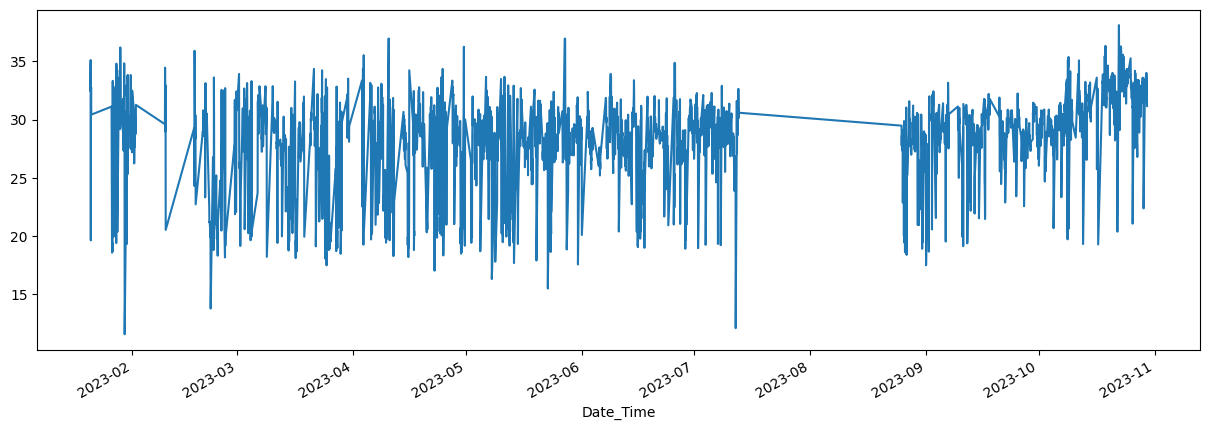

In [8]:
df = pd.read_csv('2023_one hours__normal_on_state.csv', index_col='Date_Time', parse_dates=True)
df["Combust Monitor Actual Spread 1"].plot(figsize=(15, 5));

In [9]:
df_p = df[df['GT Gross MW'] > 190][['Combust Monitor Actual Spread 1']].copy()
df_p['Date_Time'] = df_p.index

In [10]:
df_p.head()

,Combust Monitor Actual Spread 1,Date_Time
Date_Time,,
2023-01-20 17:00:00,32.684,2023-01-20 17:00:00
2023-01-20 18:00:00,32.458,2023-01-20 18:00:00
2023-01-20 19:00:00,34.742,2023-01-20 19:00:00
2023-01-20 20:00:00,35.122,2023-01-20 20:00:00
2023-01-20 21:00:00,19.609,2023-01-20 21:00:00


In [11]:
df_p.columns = ['y', 'ds']
df_p.head()

,y,ds
Date_Time,,
2023-01-20 17:00:00,32.684,2023-01-20 17:00:00
2023-01-20 18:00:00,32.458,2023-01-20 18:00:00
2023-01-20 19:00:00,34.742,2023-01-20 19:00:00
2023-01-20 20:00:00,35.122,2023-01-20 20:00:00
2023-01-20 21:00:00,19.609,2023-01-20 21:00:00


In [12]:
logdf = df_p.copy()
logdf['y'] = np.log(logdf['y'])
logdf.head()

,y,ds
Date_Time,,
2023-01-20 17:00:00,3.486886,2023-01-20 17:00:00
2023-01-20 18:00:00,3.479947,2023-01-20 18:00:00
2023-01-20 19:00:00,3.547949,2023-01-20 19:00:00
2023-01-20 20:00:00,3.558828,2023-01-20 20:00:00
2023-01-20 21:00:00,2.975989,2023-01-20 21:00:00


In [13]:
split_date = '2023-09-15'
train = logdf.loc[logdf.index <= split_date].copy()
test = logdf.loc[logdf.index > split_date].copy()

In [14]:
m3 = Prophet()

In [15]:
m3.fit(logdf)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/inrfmdaj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/y7l2tv67.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46470', 'data', 'file=/tmp/tmp7wddf6jq/inrfmdaj.json', 'init=/tmp/tmp7wddf6jq/y7l2tv67.json', 'output', 'file=/tmp/tmp7wddf6jq/prophet_modelso1b510p/prophet_model-20231102151817.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:18:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:18 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [16]:
future = m3.make_future_dataframe(periods=300, freq = 'H')

In [17]:
forecast = m3.predict(future)

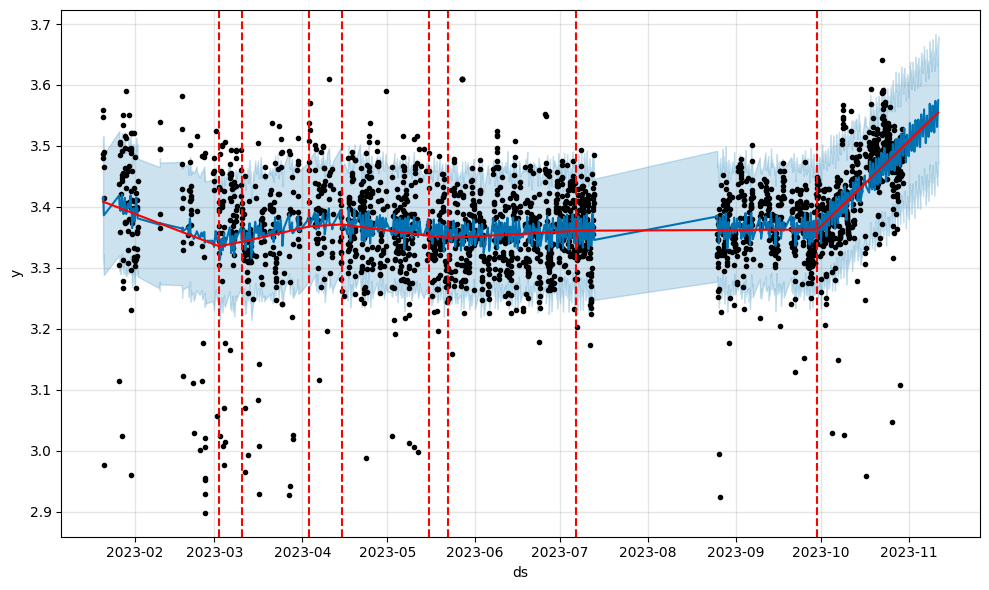

In [18]:
fig = m3.plot(forecast);
a = add_changepoints_to_plot(fig.gca(), m3, forecast)

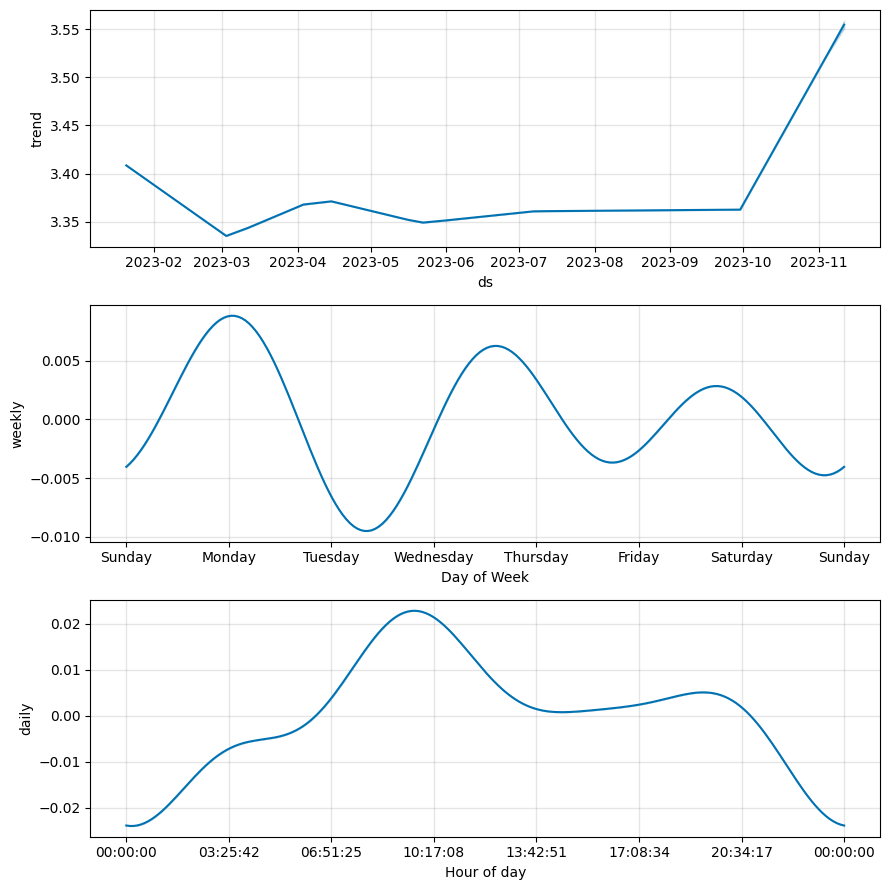

In [19]:
m3.plot_components(forecast);

In [20]:
from prophet.diagnostics import cross_validation

In [21]:
df_cv = cross_validation(
    m3,
    initial='300 hours',
    period='12 hours',
    horizon='24 hours')

INFO:prophet:Making 354 forecasts with cutoffs between 2023-02-08 20:00:00 and 2023-10-28 22:00:00


  0%|          | 0/354 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/60ary1z6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/fpxpe3f0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85015', 'data', 'file=/tmp/tmp7wddf6jq/60ary1z6.json', 'init=/tmp/tmp7wddf6jq/fpxpe3f0.json', 'output', 'file=/tmp/tmp7wddf6jq/prophet_modelwl9xtmix/prophet_model-20231102151821.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
15:18:21 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:18:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/x2h5uaup.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp7wddf6jq/i_9qavgb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local

In [22]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-09 16:00:00,3.396460,3.266926,3.527259,3.387909,2023-02-08 20:00:00
1,2023-02-09 17:00:00,3.432375,3.294673,3.569599,3.540002,2023-02-08 20:00:00
2,2023-02-09 18:00:00,3.476610,3.325907,3.614613,3.365916,2023-02-08 20:00:00
3,2023-02-09 19:00:00,3.467994,3.342649,3.610397,3.495477,2023-02-08 20:00:00
4,2023-02-09 20:00:00,3.409303,3.271511,3.538247,3.495416,2023-02-08 20:00:00
...,...,...,...,...,...,...
4244,2023-10-29 18:00:00,3.511972,3.403151,3.608335,3.526978,2023-10-28 22:00:00
4245,2023-10-29 19:00:00,3.513678,3.417418,3.618621,3.493321,2023-10-28 22:00:00
4246,2023-10-29 20:00:00,3.513067,3.409350,3.616540,3.515389,2023-10-28 22:00:00
4247,2023-10-29 21:00:00,3.508415,3.407804,3.617386,3.498596,2023-10-28 22:00:00


In [23]:
from prophet.diagnostics import performance_metrics

In [24]:
pm = performance_metrics(df_cv)
pm

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,0 days 03:00:00,0.006771,0.082285,0.057875,0.017287,0.012753,0.017222,0.913271
1,0 days 04:00:00,0.007324,0.085578,0.060008,0.017926,0.012873,0.017855,0.909335
2,0 days 05:00:00,0.006820,0.082583,0.059123,0.017620,0.012749,0.017581,0.908111
3,0 days 06:00:00,0.006146,0.078394,0.057145,0.017013,0.012544,0.016988,0.916745
4,0 days 07:00:00,0.004559,0.067522,0.052840,0.015633,0.012479,0.015662,0.940290
5,0 days 08:00:00,0.005190,0.072042,0.053215,0.015815,0.012479,0.015806,0.939858
6,0 days 09:00:00,0.006131,0.078299,0.054443,0.016294,0.010826,0.016226,0.934454
7,0 days 10:00:00,0.007081,0.084148,0.058636,0.017581,0.012920,0.017481,0.917748
8,0 days 11:00:00,0.006984,0.083570,0.061202,0.018210,0.014028,0.018178,0.898953
9,0 days 12:00:00,0.006694,0.081814,0.060020,0.017797,0.014387,0.017805,0.904443


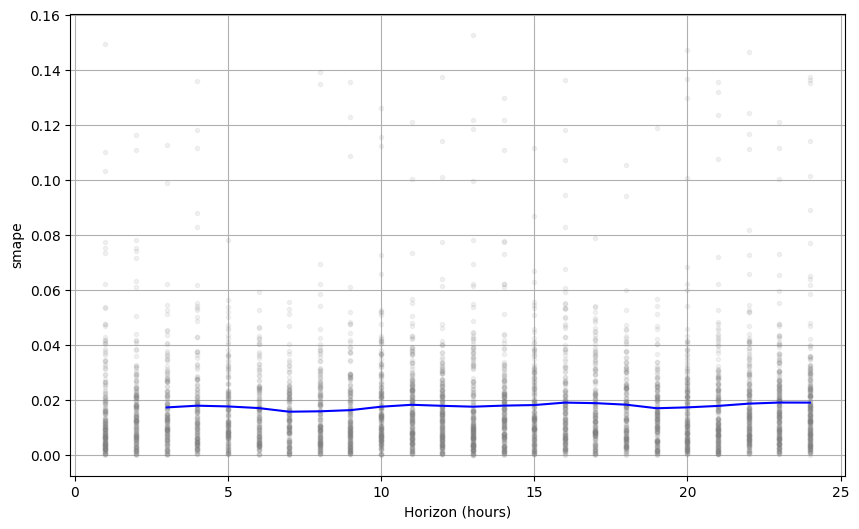

In [25]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='smape');

In [26]:
pm['smape'].mean()

0.017668146623033672

In [27]:
forecast['fact'] = logdf['y'].reset_index(drop = True)

In [28]:
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

In [29]:
df_cv.head(30)

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2023-02-09 16:00:00,3.396460,3.266926,3.527259,3.387909,2023-02-08 20:00:00
1,2023-02-09 17:00:00,3.432375,3.294673,3.569599,3.540002,2023-02-08 20:00:00
2,2023-02-09 18:00:00,3.476610,3.325907,3.614613,3.365916,2023-02-08 20:00:00
3,2023-02-09 19:00:00,3.467994,3.342649,3.610397,3.495477,2023-02-08 20:00:00
4,2023-02-09 20:00:00,3.409303,3.271511,3.538247,3.495416,2023-02-08 20:00:00
5,2023-02-17 13:00:00,3.425474,3.304947,3.561101,3.470661,2023-02-16 21:00:00
6,2023-02-17 14:00:00,3.449355,3.323111,3.582200,3.581350,2023-02-16 21:00:00
7,2023-02-17 15:00:00,3.431398,3.305270,3.560177,3.527713,2023-02-16 21:00:00
8,2023-02-17 16:00:00,3.422153,3.294548,3.544908,3.428553,2023-02-16 21:00:00
9,2023-02-17 17:00:00,3.455376,3.328952,3.599061,3.397557,2023-02-16 21:00:00
